# Transects from HYCOM1 test

In [1]:
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [2]:
db='/g/data/x77/amh157/PanAnt/panant.db'
session=cc.database.create_session(db)

In [3]:
client = Client()
client

Connection method: Cluster object,Cluster type: LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 16,Total memory: 44.92 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:39545,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 16
Started: Just now,Total memory: 44.92 GiB
Comm: tcp://127.0.0.1:41517,Total threads: 4
Dashboard: http://127.0.0.1:36433/status,Memory: 11.23 GiB
Nanny: tcp://127.0.0.1:40463,


In [4]:
def plot_transect(xloc):
    h = cc.querying.getvar('panant-hycom1', 'h', session, 
                           chunks={'xh':60,'yh':60}).isel(time=-1).sel(xh=xloc,method='nearest').load()
    u = cc.querying.getvar('panant-hycom1', 'u', session, 
                           chunks={'xq':60,'yh':60}).isel(time=-1).sel(xq=xloc,method='nearest').load()

    # Based on Ashley's fix_zcoord function
    # Technically, h and u are half a gridpoint off ... fix later!
    depth = h.cumsum(dim='zl').values
    new_u = xr.DataArray(data=u.values,dims=["zl", "yh"],
            coords=dict(yh=(["yh"], u.yh.values),depth=(["zl", "yh"], depth)),
            attrs= u.attrs)

    plt.figure(figsize=(15,10))
    plt.subplot(211)
    p1 = new_u.plot(y = "depth",add_colorbar=False)
    for ii in range(75):
        if np.mod(ii,10)==5:
            plt.plot(u.yh.values,depth[ii,:],'m',linewidth=0.6)
        else:
            plt.plot(u.yh.values,depth[ii,:],'k',linewidth=0.3)
    plt.ylim([0,500])
    plt.gca().invert_yaxis()
    plt.title('Zonal velocity, %d °E'%xloc)

    plt.subplot(212)
    new_u.plot(y = "depth",add_colorbar=False)
    for ii in range(75):
        if np.mod(ii,10)==5:
            plt.plot(u.yh.values,depth[ii,:],'m',linewidth=0.6)
        else:
            plt.plot(u.yh.values,depth[ii,:],'k',linewidth=0.3)
    plt.ylim([500,5500])
    plt.gca().invert_yaxis()

    plt.subplots_adjust(hspace=0)

    ax_c = plt.axes([0.92,0.3,0.01,0.4])
    plt.colorbar(p1,ax_c)

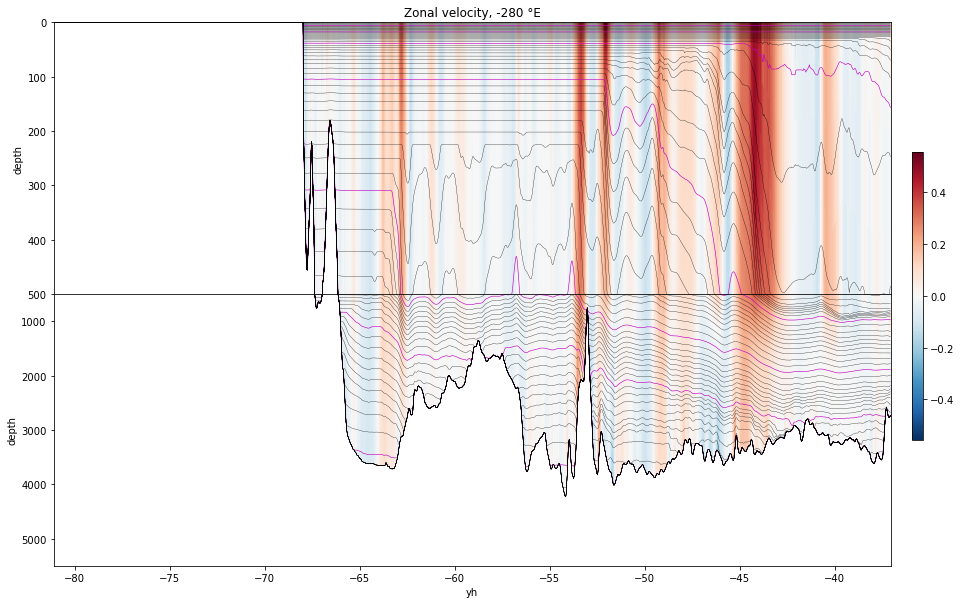

In [5]:
plot_transect(-280)

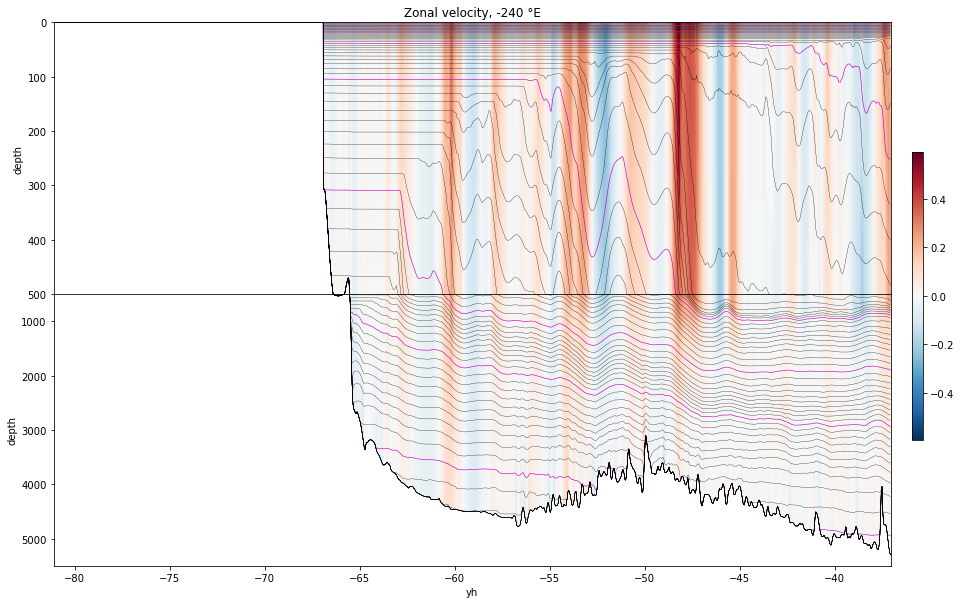

In [6]:
plot_transect(-240)

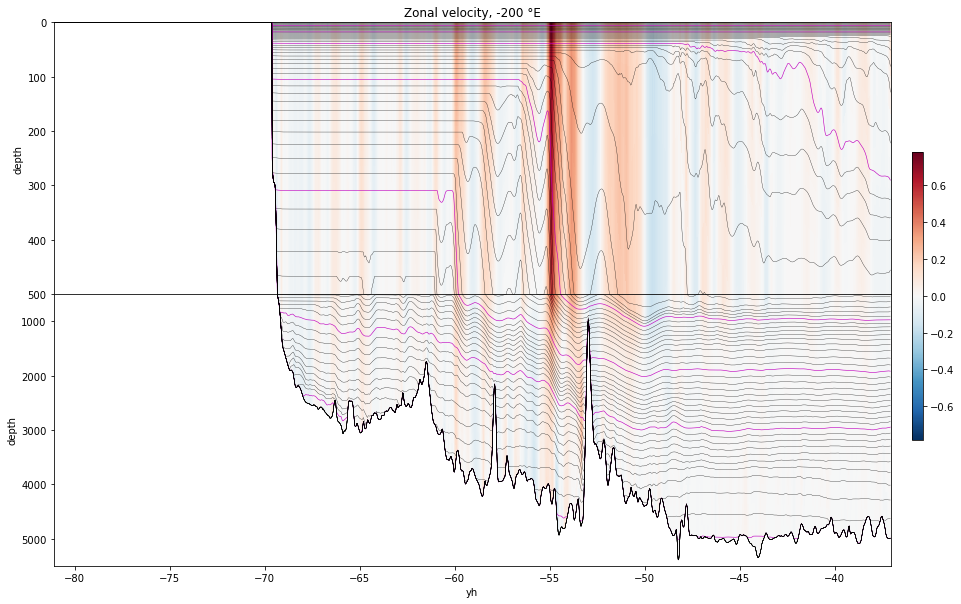

In [7]:
plot_transect(-200)

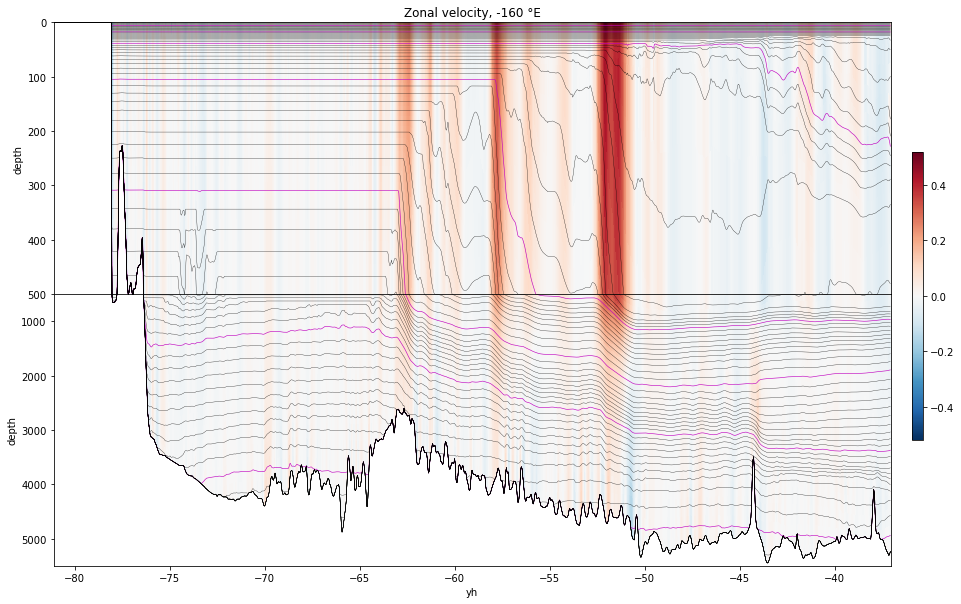

In [8]:
plot_transect(-160)

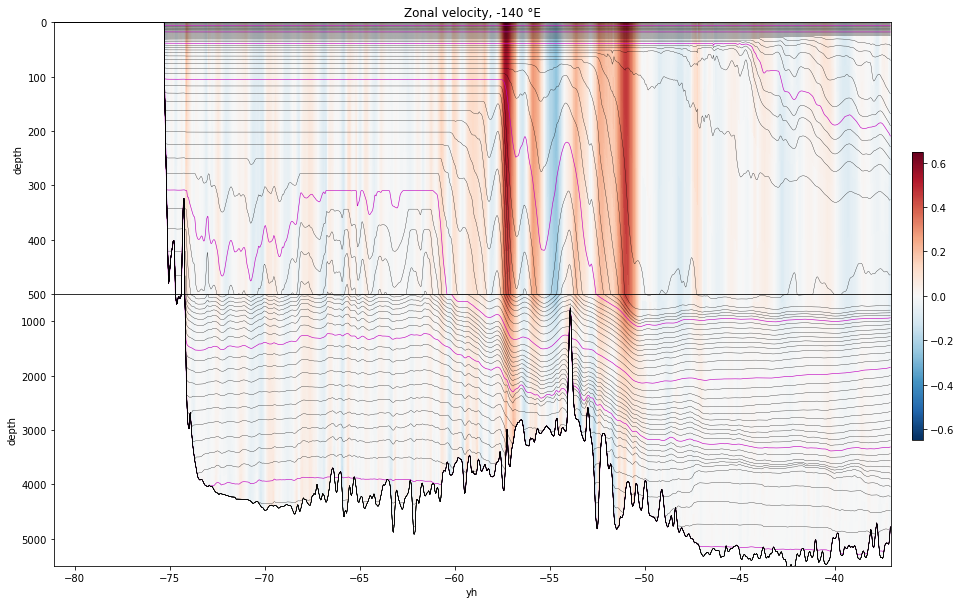

In [9]:
plot_transect(-140)

distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)


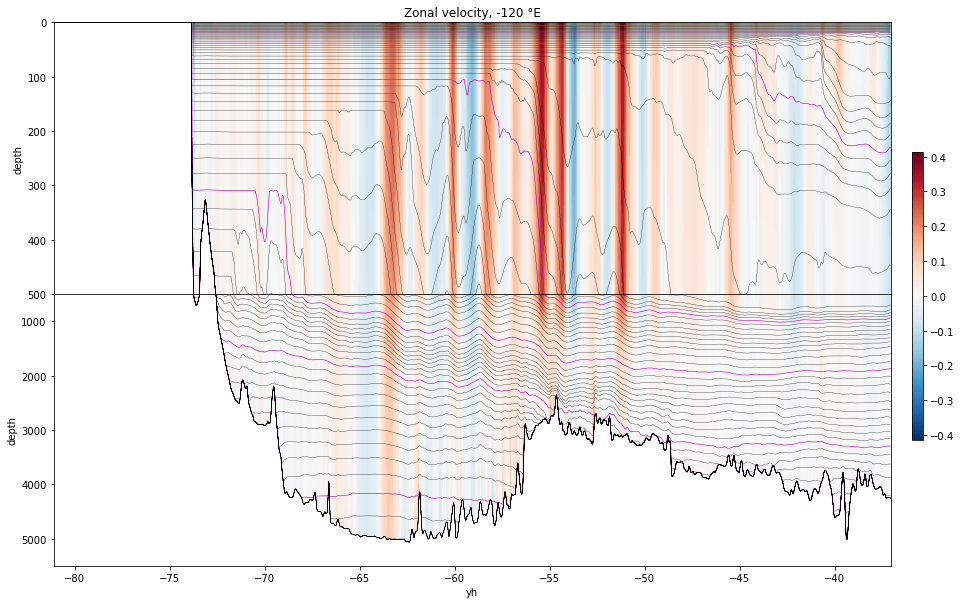

In [10]:
plot_transect(-120)

distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)


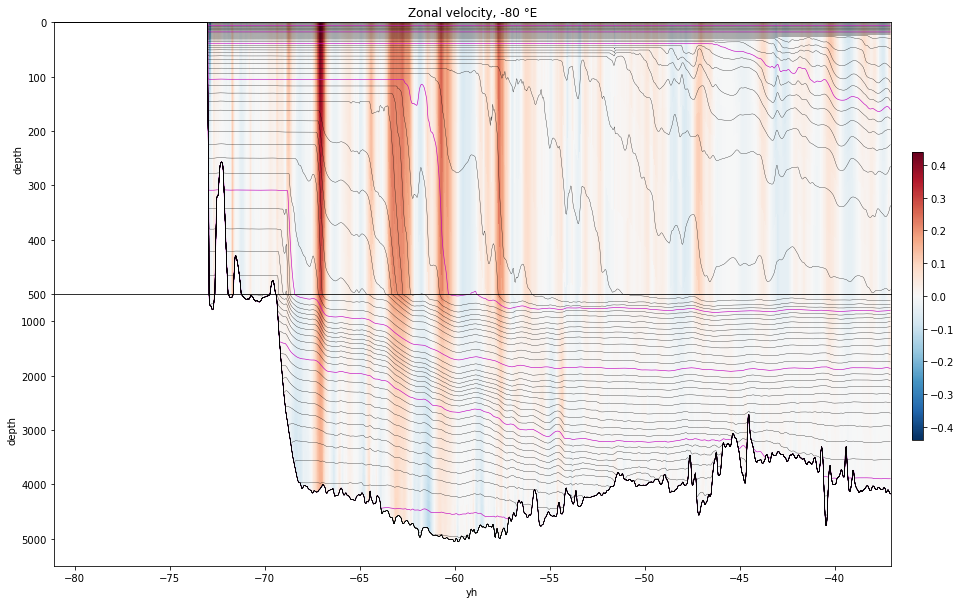

In [11]:
plot_transect(-80)

distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)


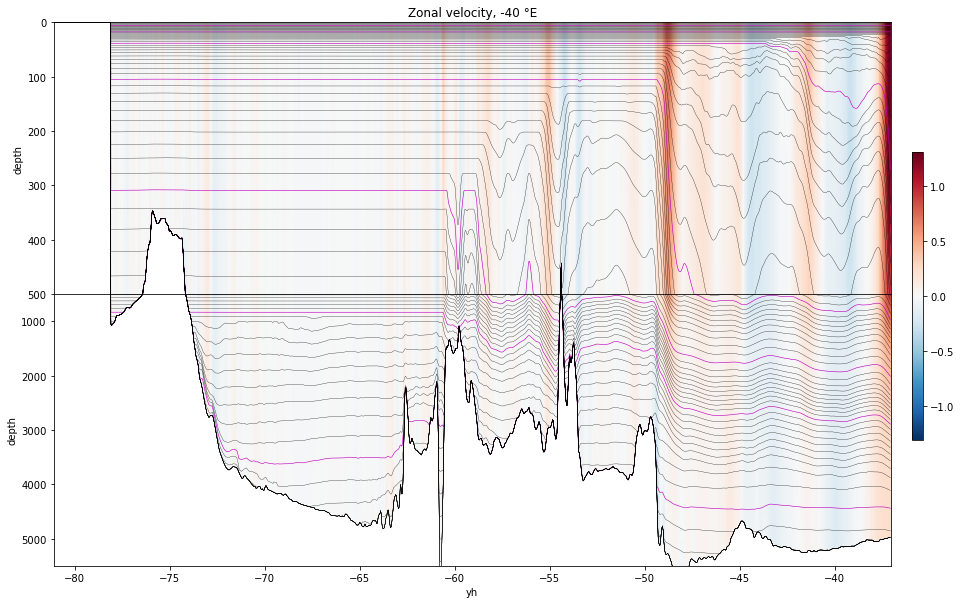

In [12]:
plot_transect(-40)

distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)


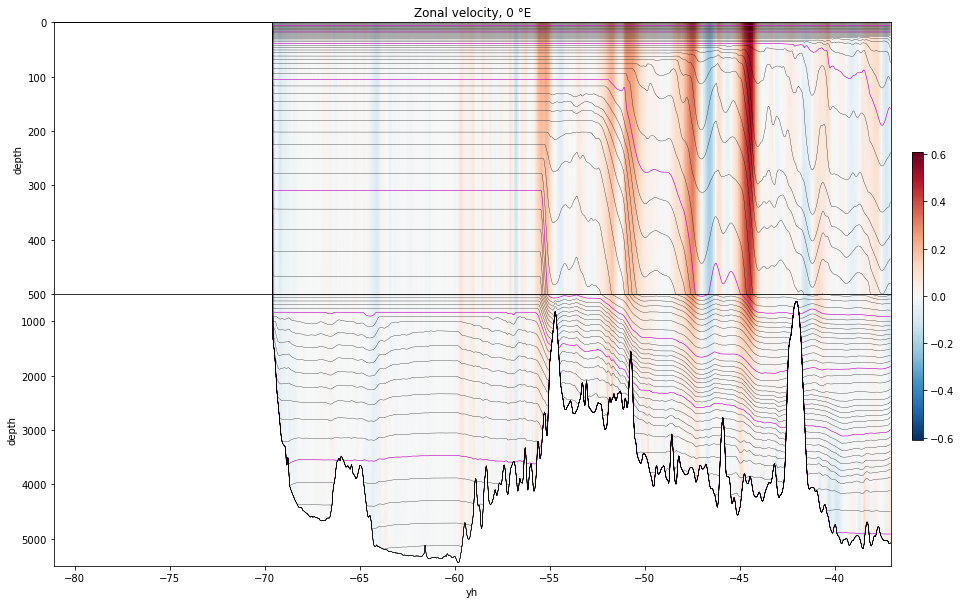

In [13]:
plot_transect(0)

distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)


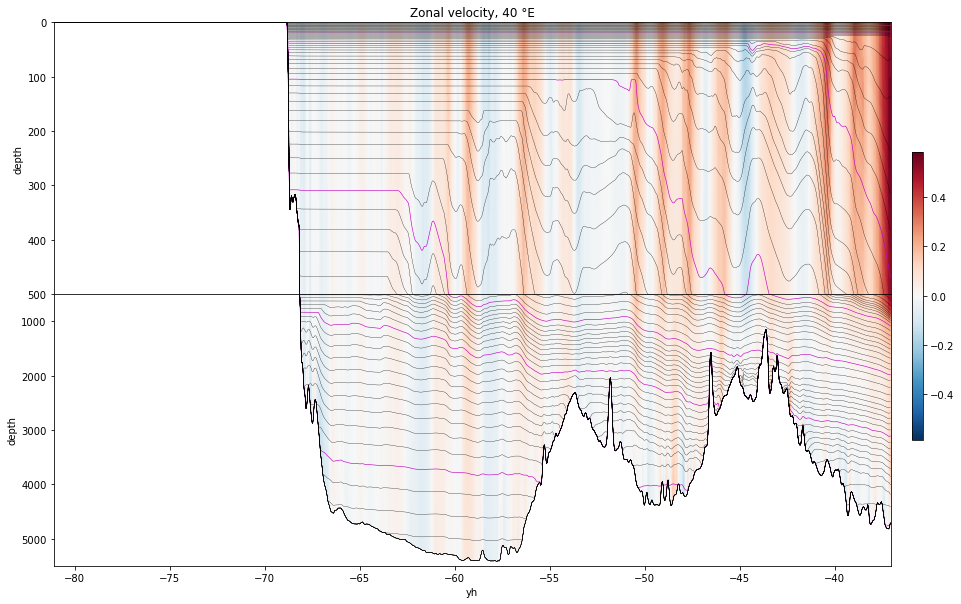

In [14]:
plot_transect(40)

distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)


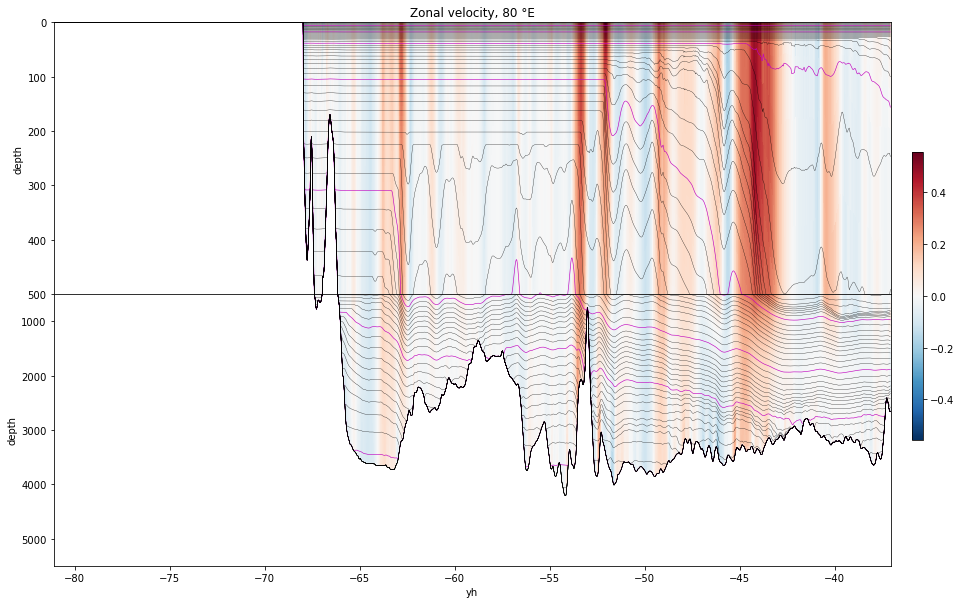

In [15]:
plot_transect(80)